In [2]:
pip install causalnex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import warnings
from causalnex.structure import StructureModel

warnings.filterwarnings("ignore")

sm = StructureModel()

In [2]:
sm.add_edges_from([
                  ('health', 'absences'),
                  ('health', 'G1')
])

In [3]:
sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

In [4]:
import os

In [17]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 62 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [18]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pygraphviz-1.7.zip (118 kB)
  Created wheel for pygraphviz: filename=pygraphviz-1.7-cp37-cp37m-linux_x86_64.whl size=165757 sha256=1b86687db95f4f219d70c5c43254624ef8f0d7b07f7d2c70249c20c3008d7353
  Stored in directory: /root/.cache/pip/wheels/8c/bc/0c/ac35392b72556e75107ff610cb31b313e8471918a6d280e34c
Successfully built pygraphviz


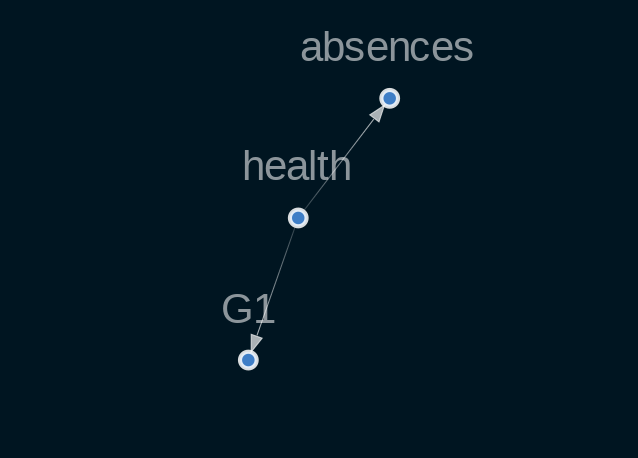

In [5]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(sm,
                     graph_attributes={"scale":"0.5"},
                     all_node_attributes = NODE_STYLE.WEAK,
                     all_edge_attributes = EDGE_STYLE.WEAK)

Image(viz.draw(format='png'))

In [6]:
import pandas as pd

data = pd.read_csv('/tmp/Data/student-por.csv', delimiter=';')
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
drop_col = ['school', 'sex', 'age', 'Mjob', 'Fjob', 'reason', 'guardian']

data = data.drop(columns = drop_col)
data.head()

address famsize Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0       U     GT3       A     4     4           2          2         0   
1       U     GT3       T     1     1           1          2         0   
2       U     LE3       T     1     1           1          2         0   
3       U     GT3       T     4     2           1          3         0   
4       U     GT3       T     3     3           1          2         0   

  schoolsup famsup  ... famrel freetime goout Dalc Walc health  absences  G1  \
0       yes     no  ...      4        3     4    1    1      3         4   0   
1        no    yes  ...      5        3     3    1    1      3         2   9   
2       yes     no  ...      4        3     2    2    3      3         6  12   
3        no    yes  ...      3        2     2    1    1      5         0  14   
4        no    yes  ...      4        3     2    1    2      5         0  11   

   G2  G3  
0  11  11  
1  11  11  
2  13  12  
3  14  14  
4  13  13  

[5 rows x 26 columns]

In [9]:
import numpy as np

struct_data = data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns) #mengambil kolom yang bertipe non-numeric
print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
  struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head()

address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0        1        0        0     4     4           2          2         0   
1        1        0        1     1     1           1          2         0   
2        1        1        1     1     1           1          2         0   
3        1        0        1     4     2           1          3         0   
4        1        0        1     3     3           1          2         0   

   schoolsup  famsup  ...  famrel  freetime  goout  Dalc  Walc  health  \
0          1       0  ...       4         3      4     1     1       3   
1          0       1  ...       5         3      3     1     1       3   
2          1       0  ...       4         3      2     2     3       3   
3          0       1  ...       3         2      2     1     1       5   
4          0       1  ...       4         3      2     1     2       5   

   absences  G1  G2  G3  
0         4   0  11  11  
1         2   9  11  11  
2         6  12  13  12  
3         0  14  14  14  
4         0  11  13  13  

[5 rows x 26 columns]

In [11]:
from causalnex.structure.notears import from_pandas

sm = from_pandas(struct_data)

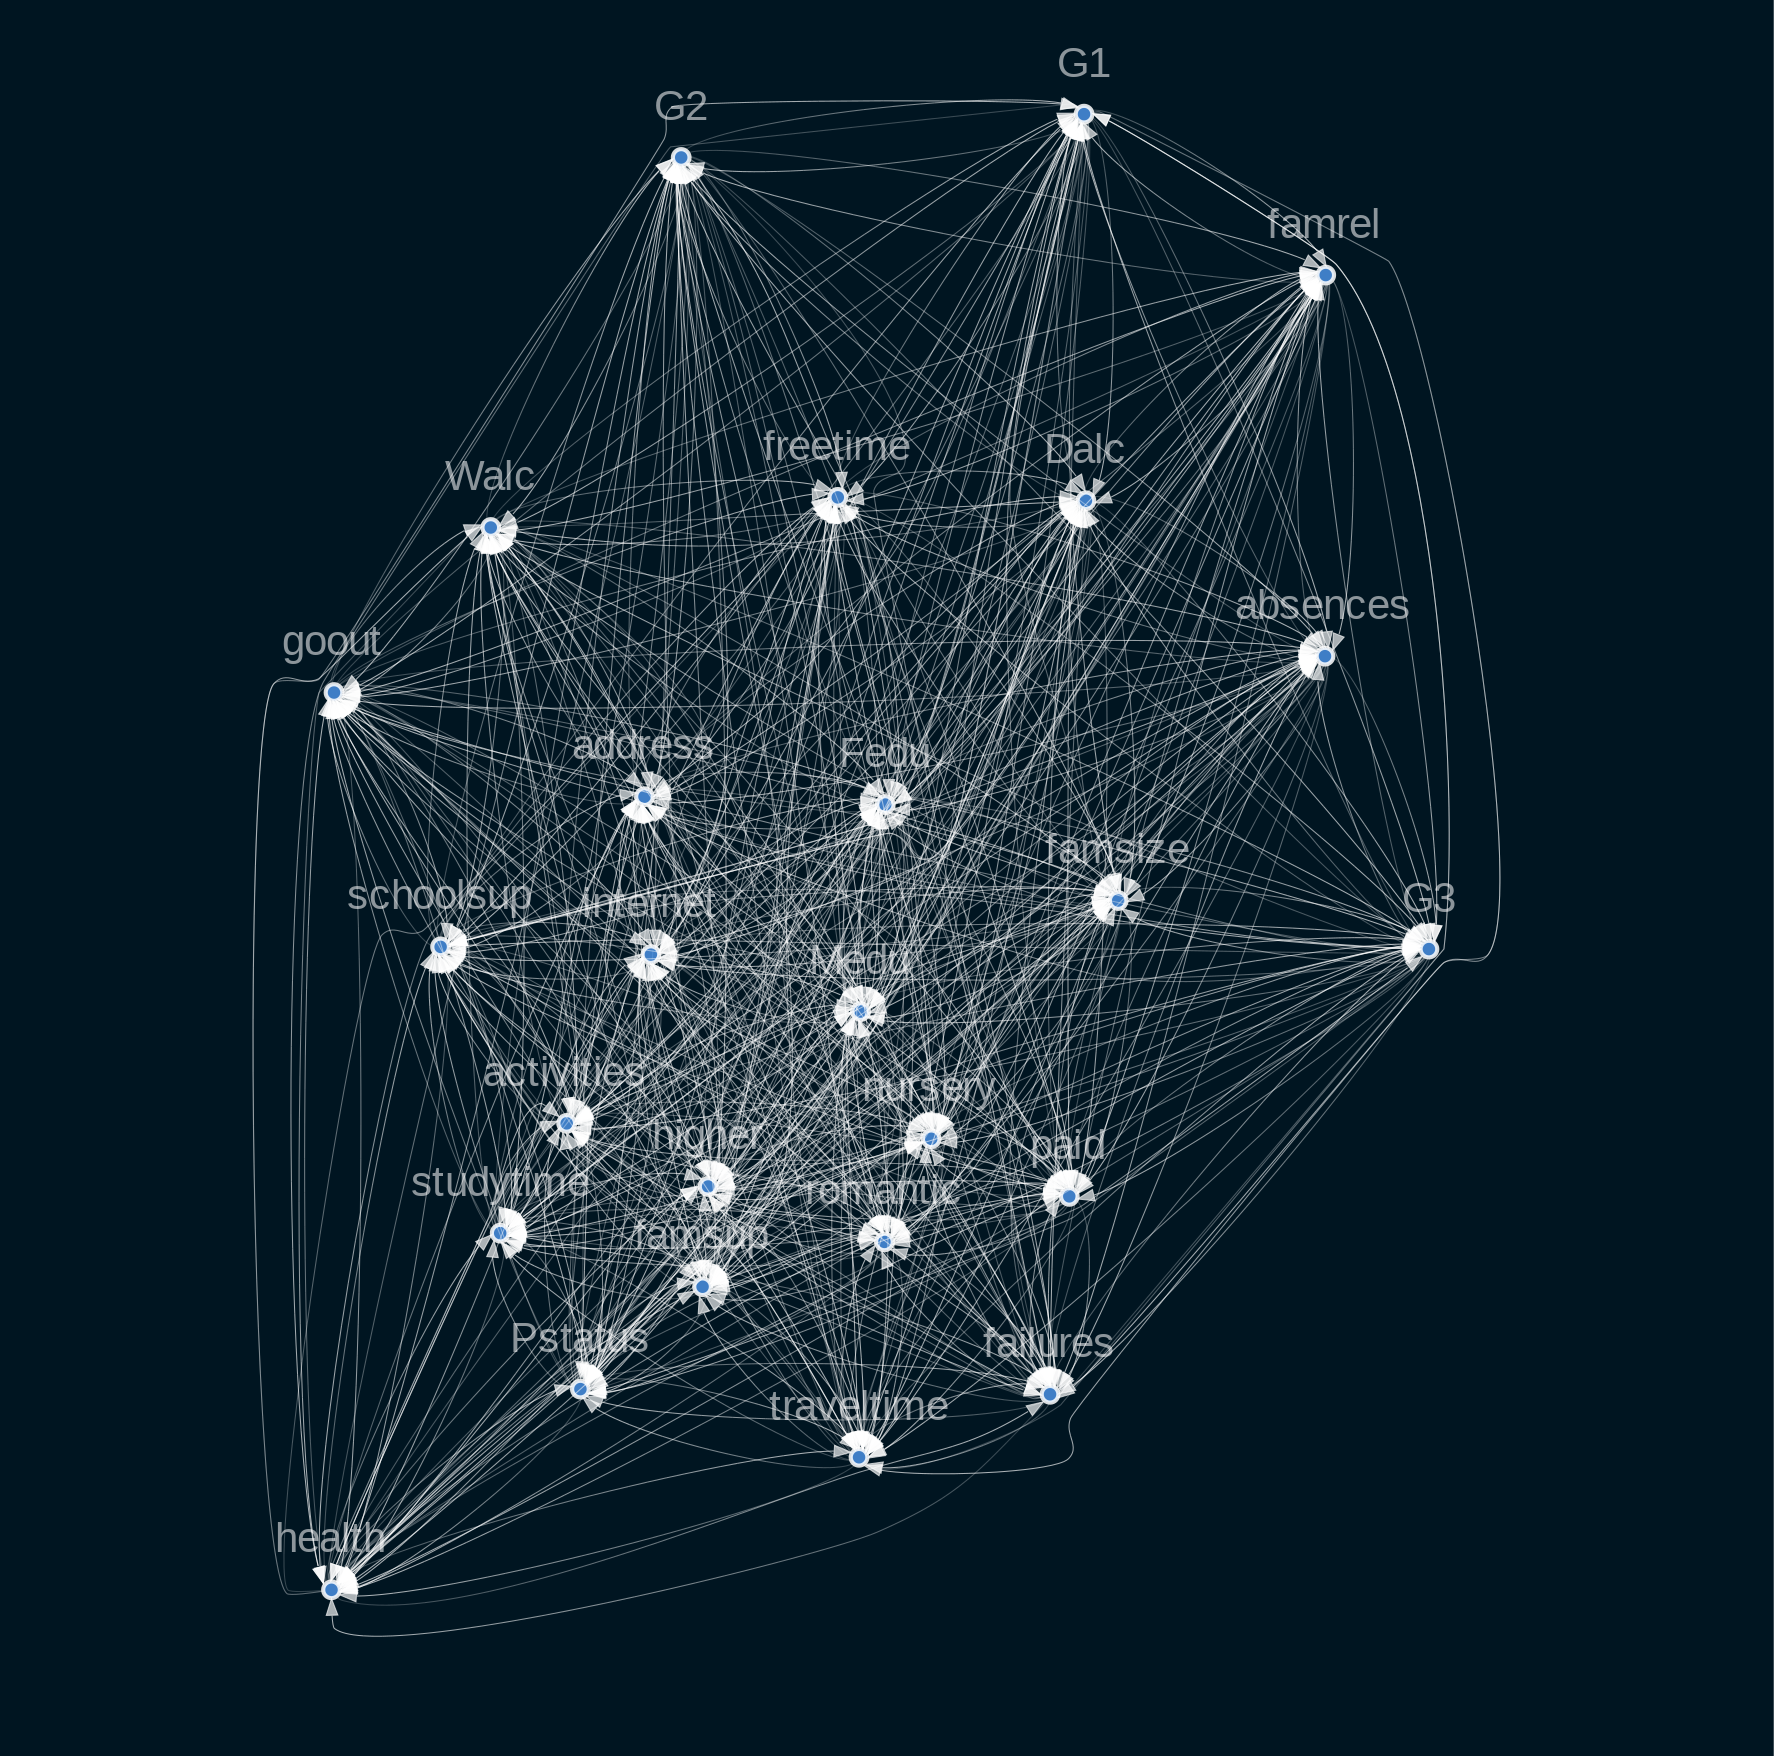

In [12]:
viz = plot_structure(
    sm,
    graph_attributes={'scale':'0.5'},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp'
)

Image(viz.draw(format='png'))

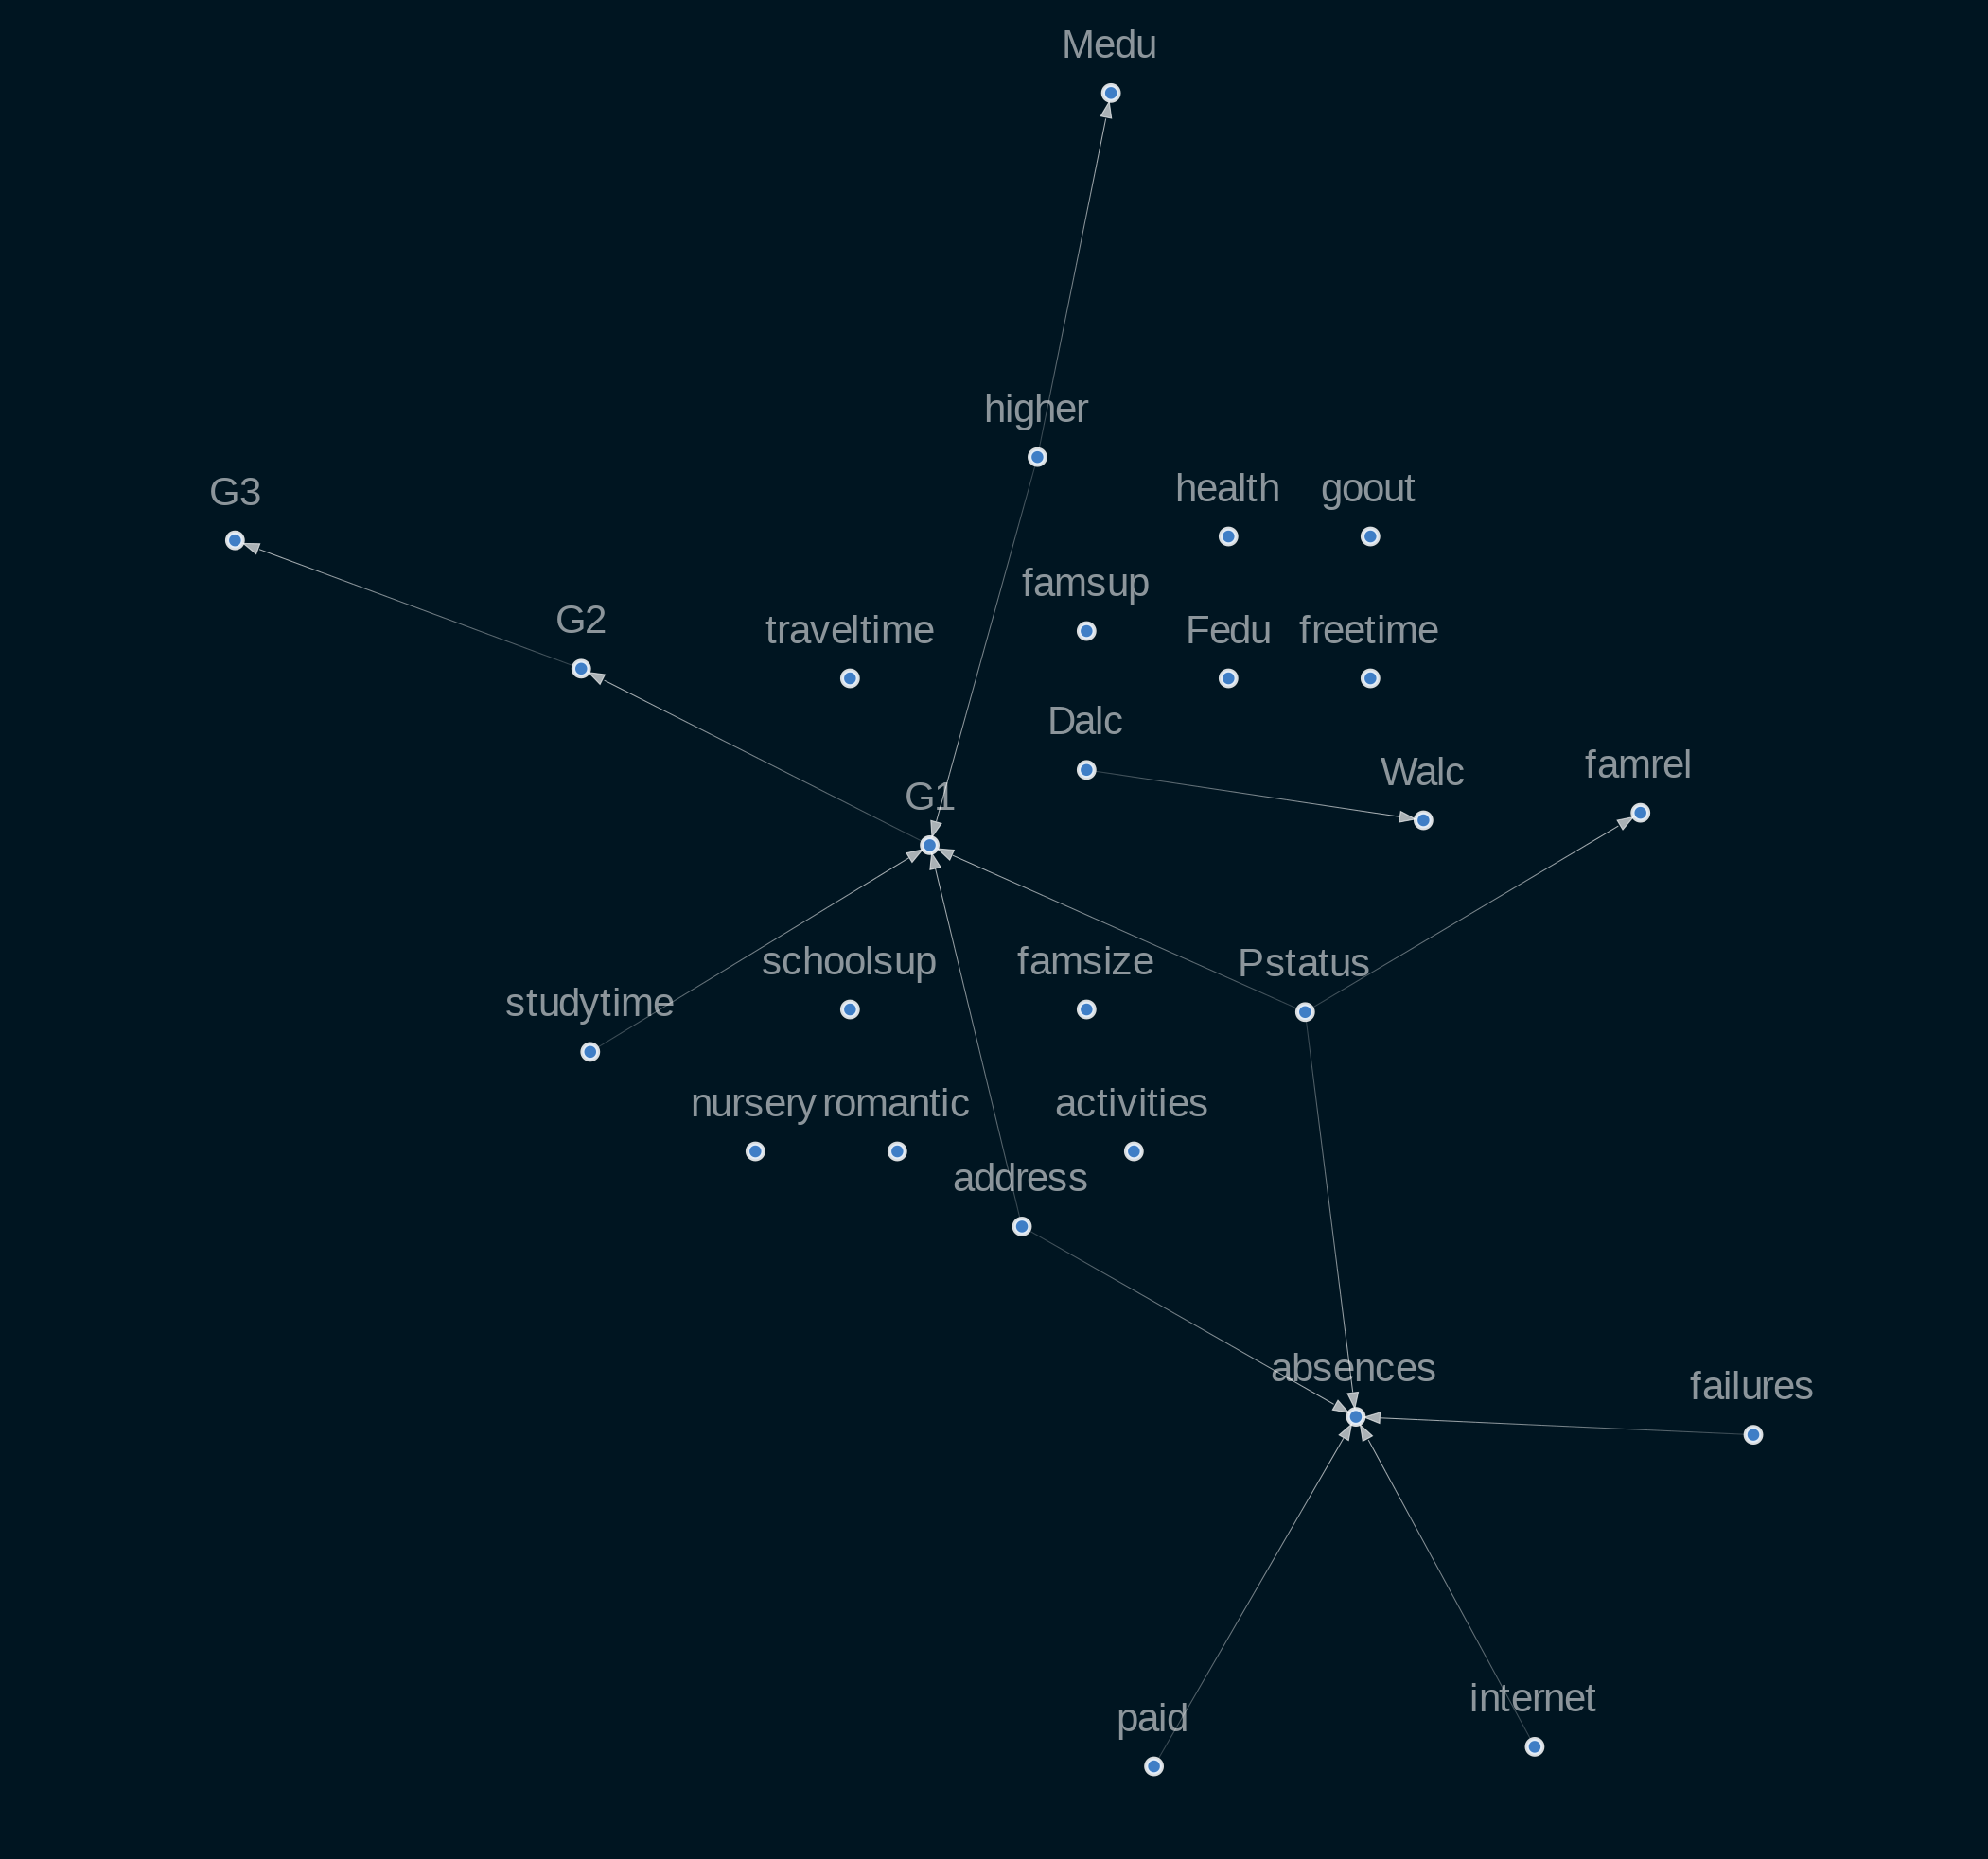

In [13]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={'scale':'1.2'},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK
)

Image(viz.draw(format='png'))

In [14]:
sm = from_pandas(struct_data, tabu_edges=[('higher', 'Medu')], w_threshold=0.8)

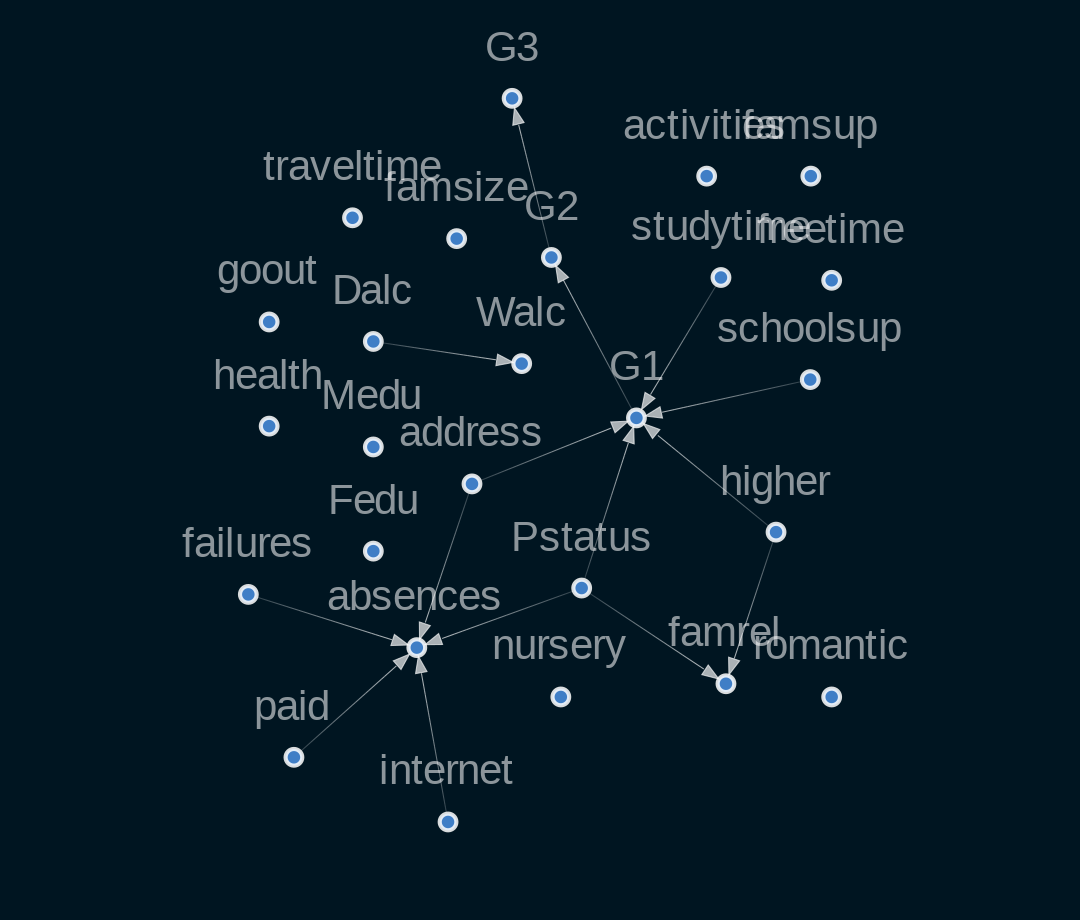

In [15]:
viz = plot_structure(
    sm,
    graph_attributes = {'scale':'0.5'},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK
)
Image(viz.draw(format='png'))

In [16]:
sm.add_edge("failures", "G1")
sm.remove_edge("Pstatus", "G1")
sm.remove_edge("address", "G1")

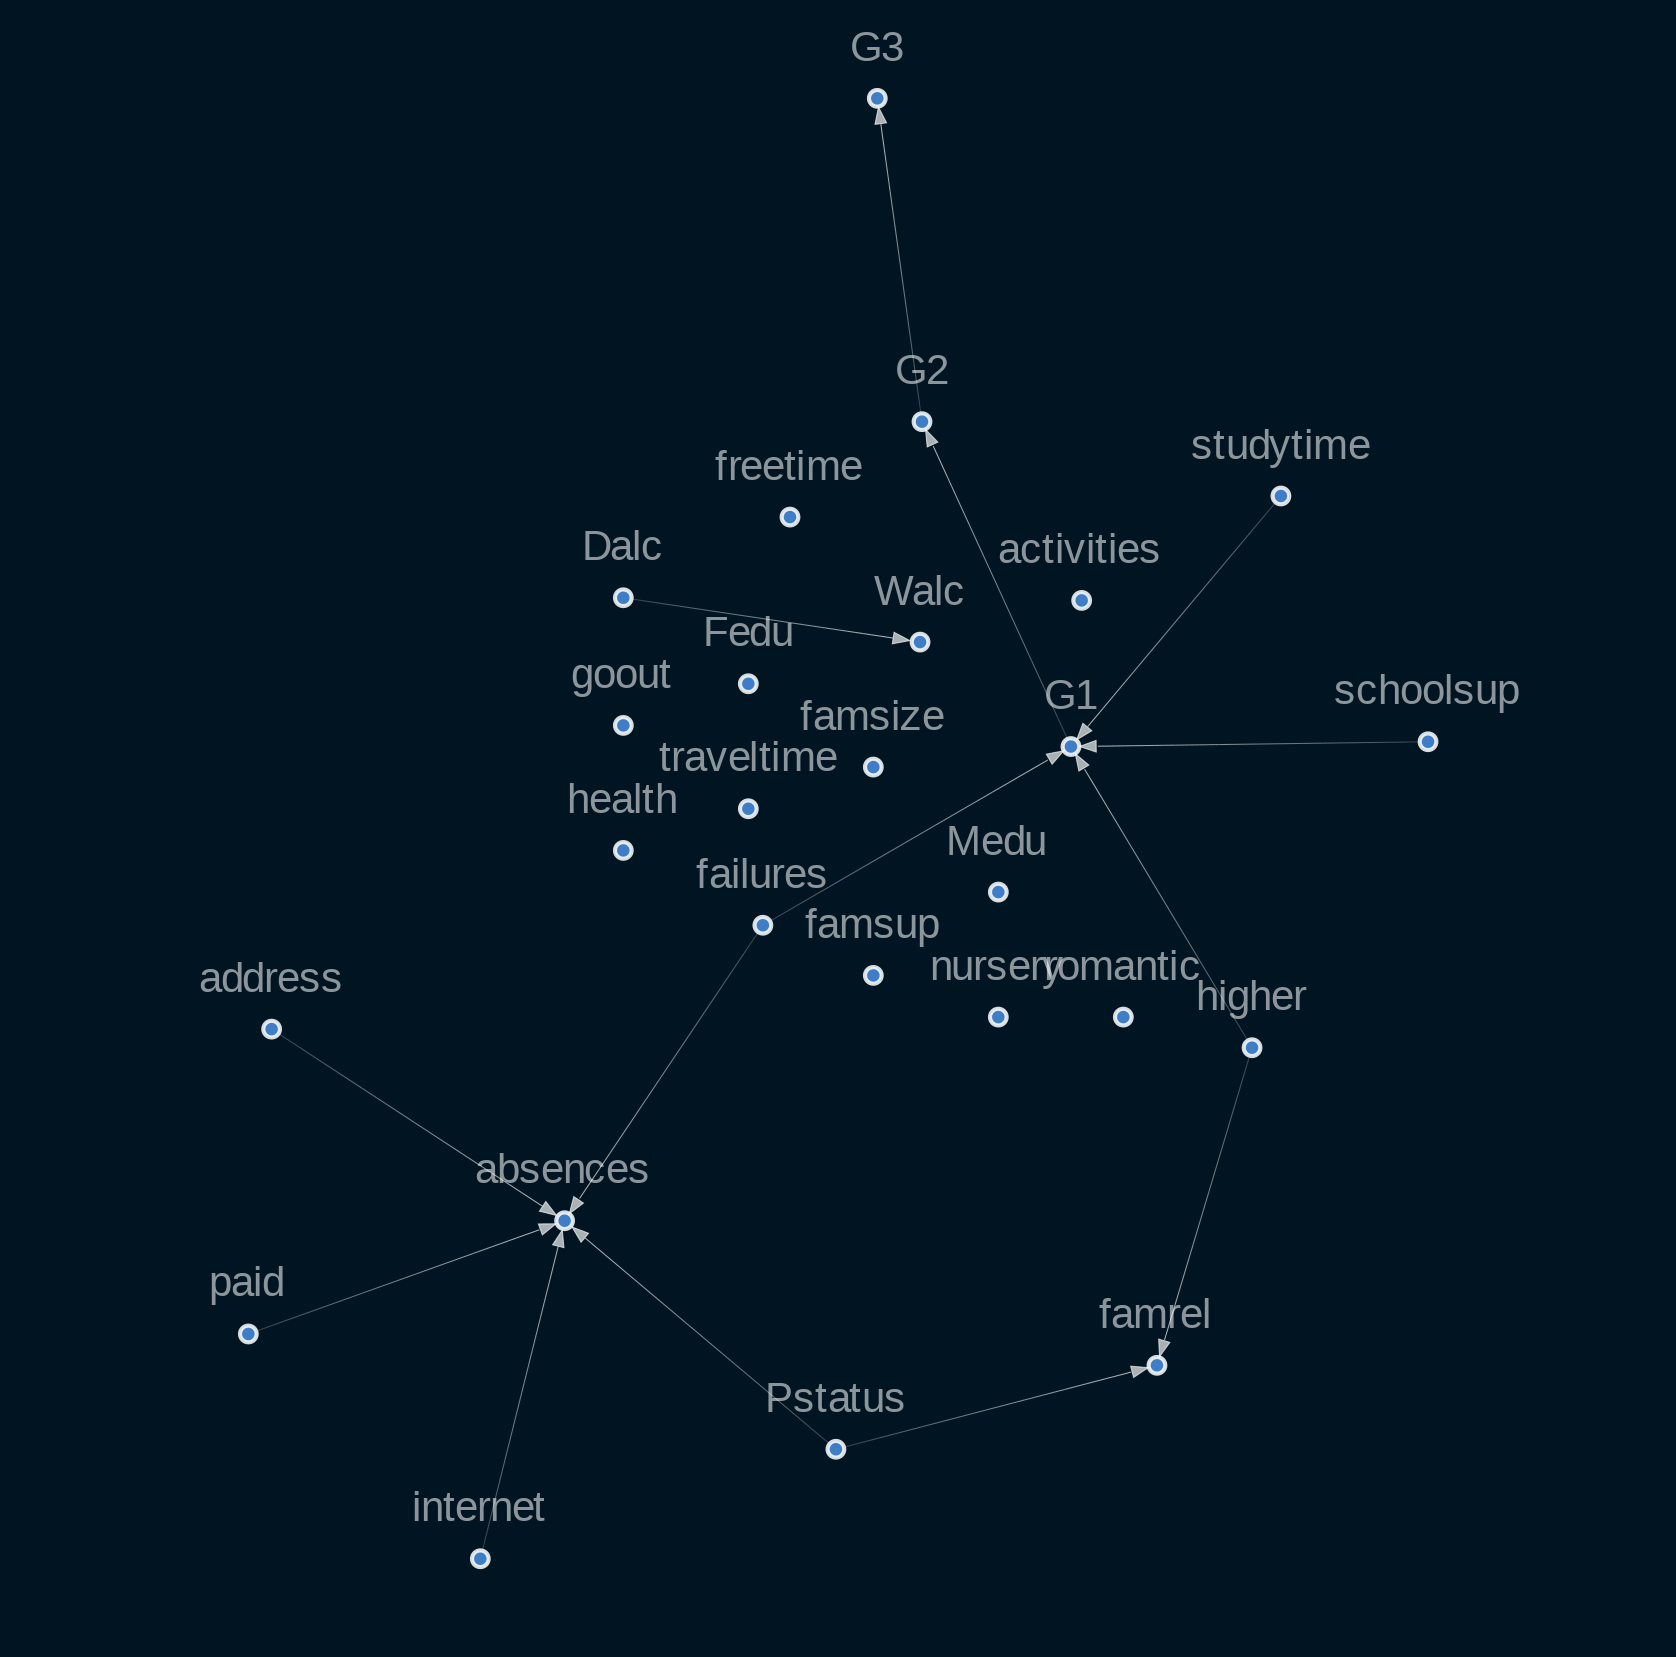

In [19]:
viz = plot_structure(
    sm,
    graph_attributes={'scale':1.0},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK
)
Image(viz.draw(format='png'))

In [20]:
sm.add_edge("health", "absences")

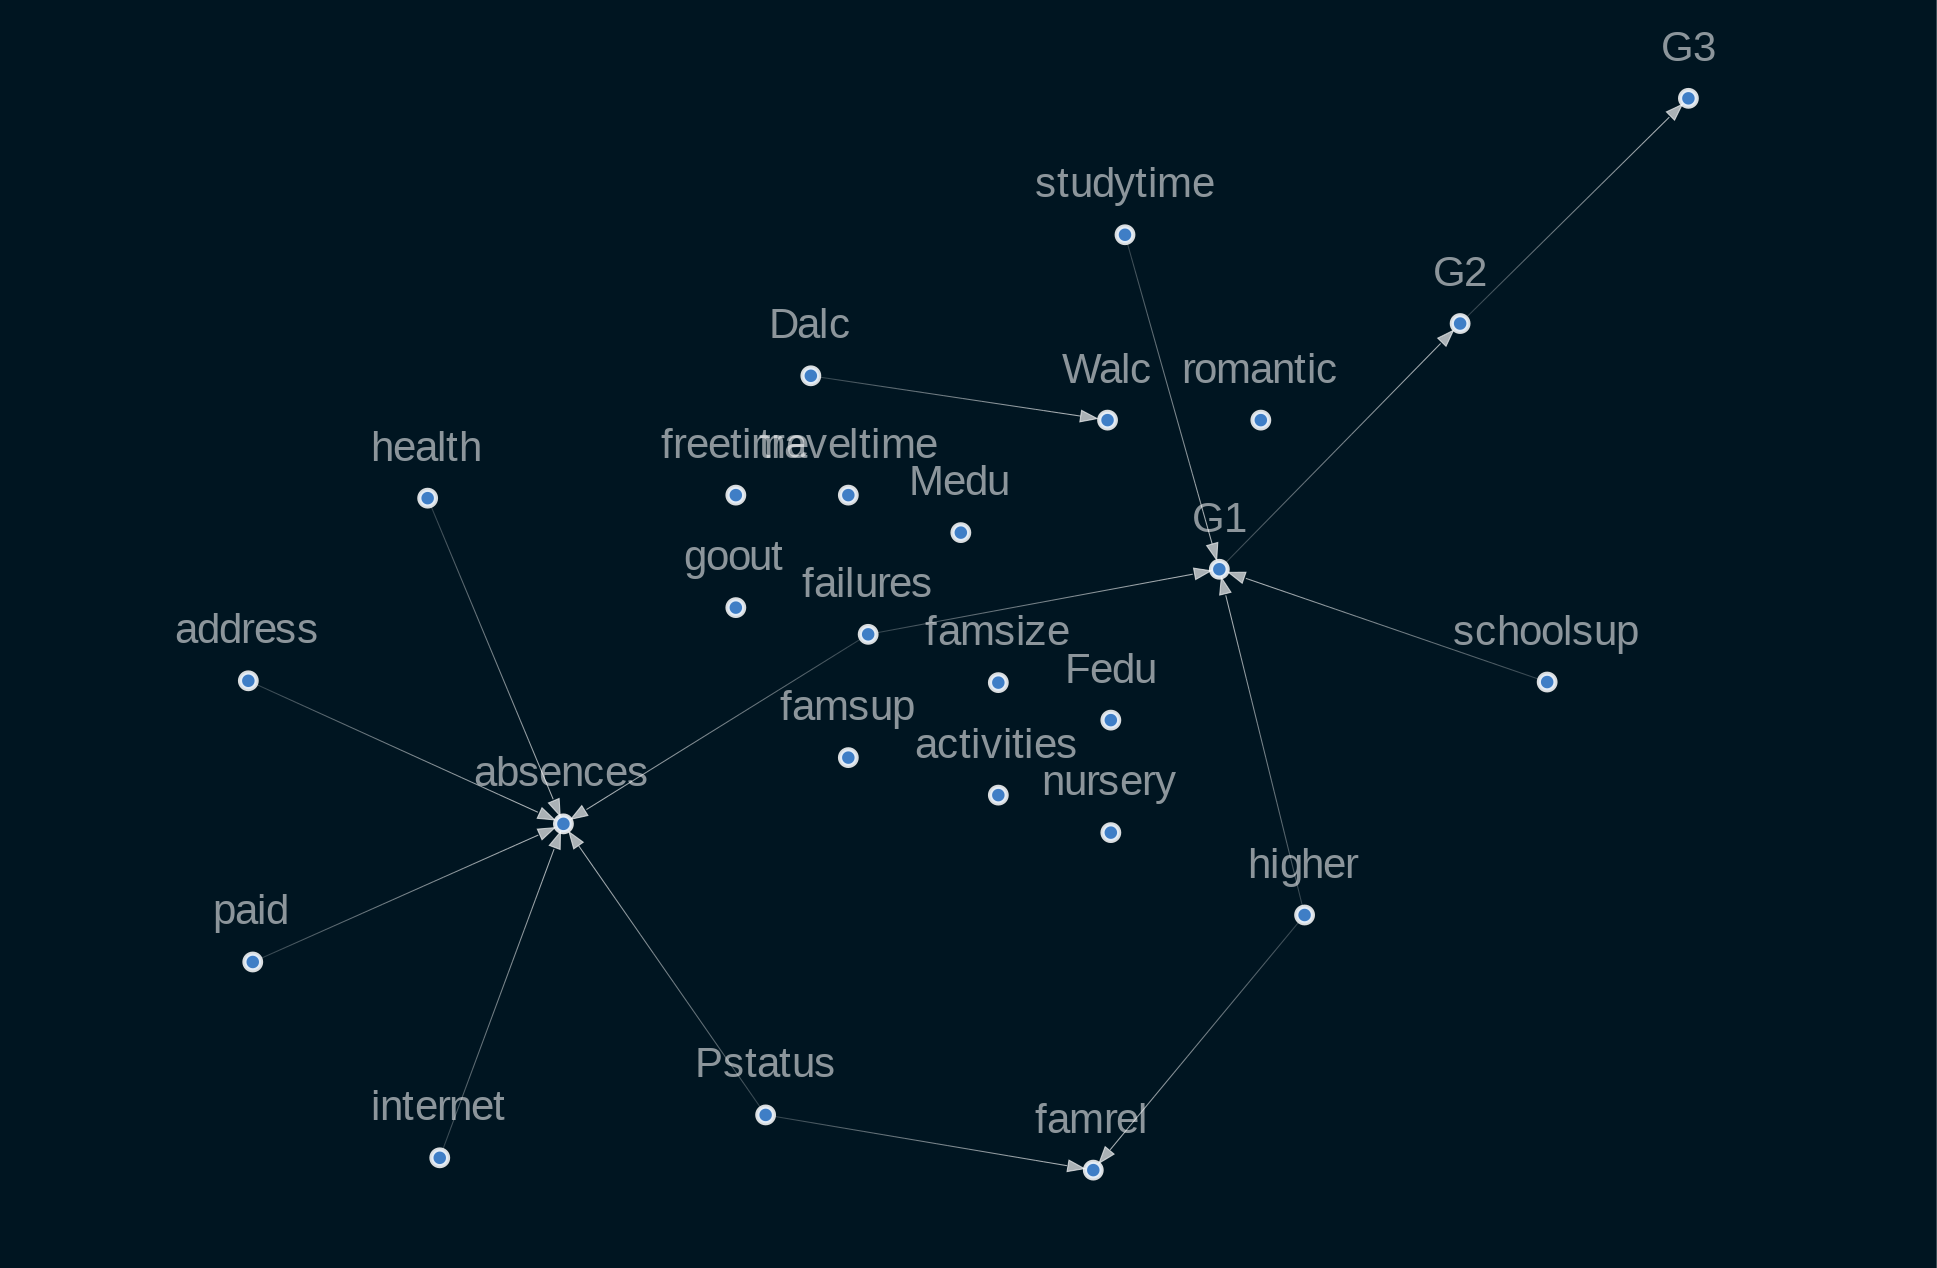

In [21]:
viz = plot_structure(
    sm,
    graph_attributes = {'scale':'1.0'},
    all_node_attributes = NODE_STYLE.WEAK,
    all_edge_attributes = EDGE_STYLE.WEAK
)

Image(viz.draw(format='png'))

In [22]:
sm.add_edge("health", "studytime")

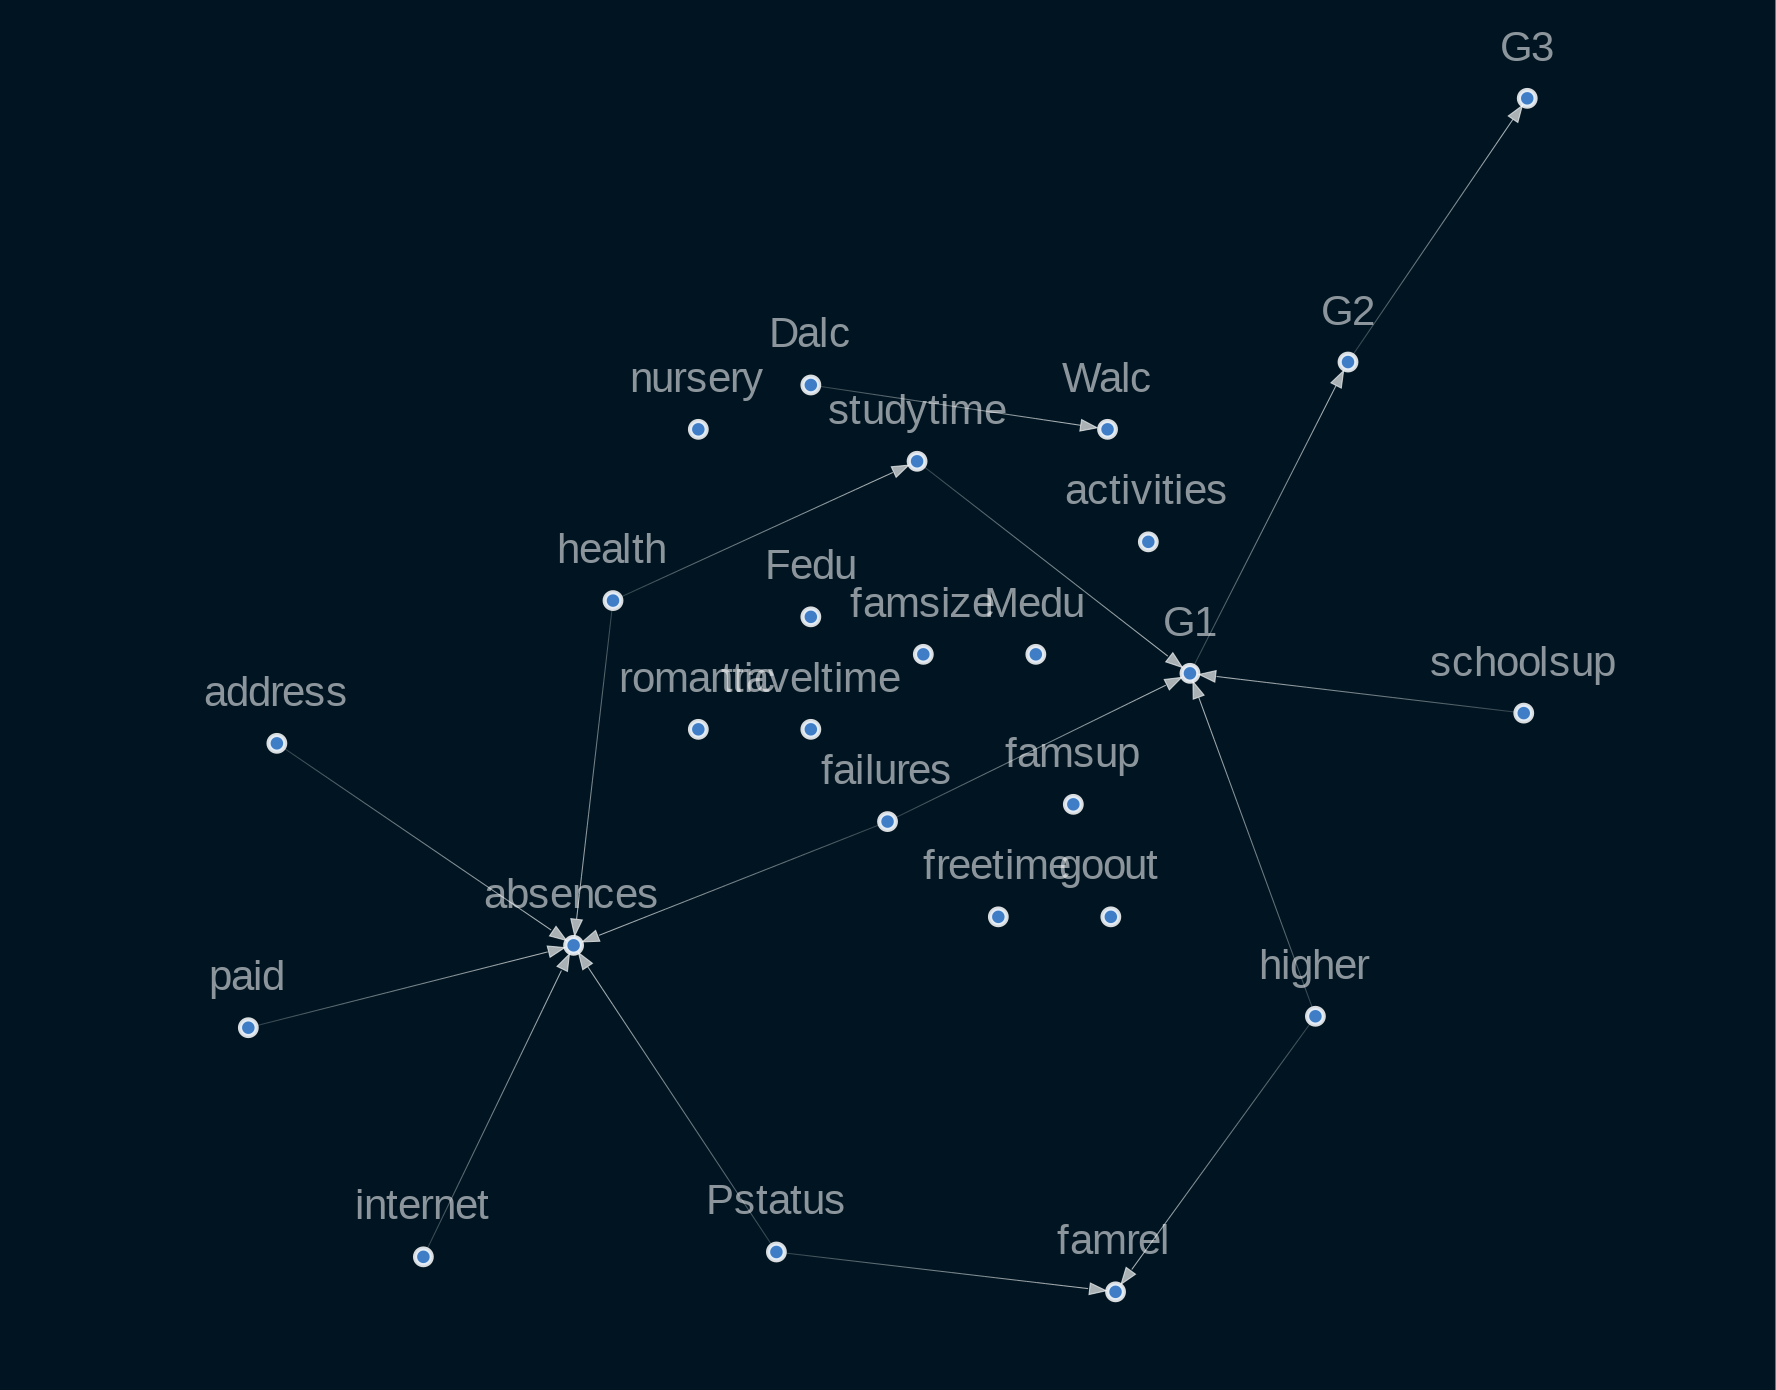

In [23]:
viz = plot_structure(
    sm,
    graph_attributes = {'scale':'1.0'},
    all_node_attributes = NODE_STYLE.WEAK,
    all_edge_attributes = EDGE_STYLE.WEAK
)

Image(viz.draw(format='png'))

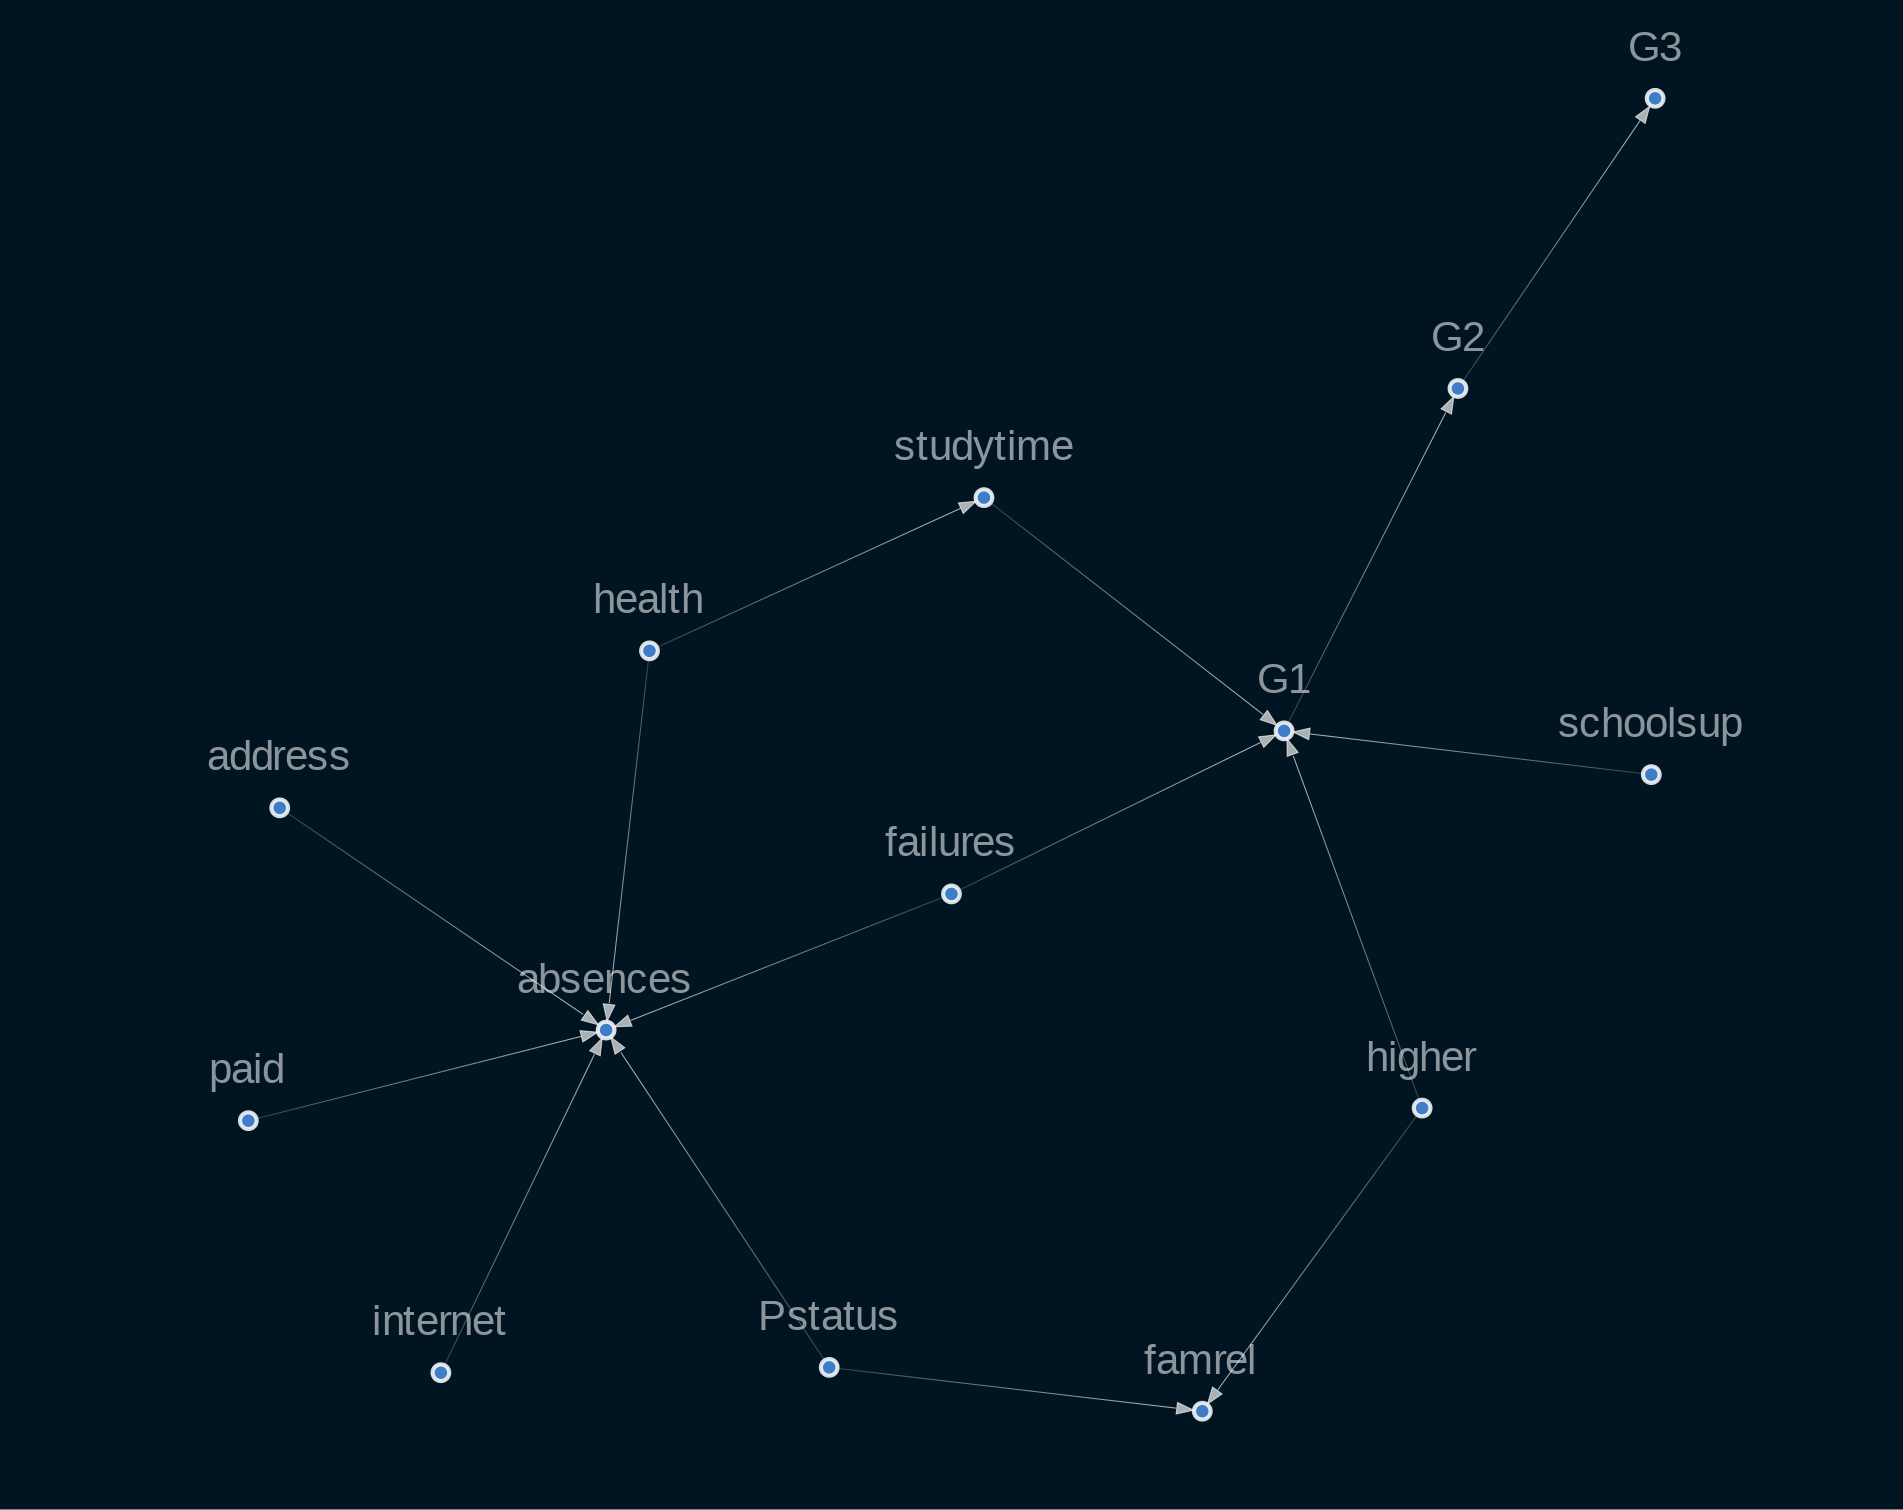

In [25]:

sm = sm.get_largest_subgraph()
viz = plot_structure(
    sm,
    graph_attributes = {'scale':'1.1'},
    all_node_attributes = NODE_STYLE.WEAK,
    all_edge_attributes = EDGE_STYLE.WEAK
)

Image(viz.draw(format='png'))

In [26]:
import networkx as nx

nx.drawing.nx_pydot.write_dot(sm, 'graph.dot')

In [28]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

In [31]:
data.head()

address famsize Pstatus  Medu  Fedu  traveltime  studytime  failures  \
0       U     GT3       A     4     4           2          2         0   
1       U     GT3       T     1     1           1          2         0   
2       U     LE3       T     1     1           1          2         0   
3       U     GT3       T     4     2           1          3         0   
4       U     GT3       T     3     3           1          2         0   

  schoolsup famsup  ... famrel freetime goout Dalc Walc health  absences  G1  \
0       yes     no  ...      4        3     4    1    1      3         4   0   
1        no    yes  ...      5        3     3    1    1      3         2   9   
2       yes     no  ...      4        3     2    2    3      3         6  12   
3        no    yes  ...      3        2     2    1    1      5         0  14   
4        no    yes  ...      4        3     2    1    2      5         0  11   

   G2  G3  
0  11  11  
1  11  11  
2  13  12  
3  14  14  
4  13  13  

[5 rows x 26 columns]

In [46]:
data['absences']['0'].count()

KeyError: ignored

In [33]:
discretised_data = data.copy()
data_vals = {col: data[col].unique() for col in data.columns}

failures_map = {v: 'no-failure' if v == [0]
                else 'have-failure' for v in data_vals['failures']}

studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

health_map = {v: 'very-bad' if v in [1,2,3]
              else 'very-good' for v in data_vals['health']}

In [34]:
discretised_data['failures'] = discretised_data['failures'].map(failures_map)
discretised_data['studytime'] = discretised_data['studytime'].map(studytime_map)
discretised_data['health'] = discretised_data['health'].map(health_map)

In [35]:
discretised_data.head()

address famsize Pstatus  Medu  Fedu  traveltime        studytime  \
0       U     GT3       A     4     4           2  short-studytime   
1       U     GT3       T     1     1           1  short-studytime   
2       U     LE3       T     1     1           1  short-studytime   
3       U     GT3       T     4     2           1   long-studytime   
4       U     GT3       T     3     3           1  short-studytime   

     failures schoolsup famsup  ... famrel freetime goout Dalc Walc  \
0  no-failure       yes     no  ...      4        3     4    1    1   
1  no-failure        no    yes  ...      5        3     3    1    1   
2  no-failure       yes     no  ...      4        3     2    2    3   
3  no-failure        no    yes  ...      3        2     2    1    1   
4  no-failure        no    yes  ...      4        3     2    1    2   

      health  absences  G1  G2  G3  
0   very-bad         4   0  11  11  
1   very-bad         2   9  11  11  
2   very-bad         6  12  13  12  
3  very-good         0  14  14  14  
4  very-good         0  11  13  13  

[5 rows x 26 columns]

In [37]:
discretised_data['absences'].max()

32

In [47]:
from causalnex.discretiser import Discretiser

discretised_data['absences'] = Discretiser(method='fixed',
                                           numeric_split_points = [1, 10]).transform(discretised_data['absences'].values)
discretised_data['G1'] = Discretiser(method='fixed',
                                     numeric_split_points = [10]).transform(discretised_data['G1'].values)
discretised_data['G2'] = Discretiser(method='fixed',
                                     numeric_split_points=[10]).transform(discretised_data['G2'].values)
discretised_data['G3'] = Discretiser(method='fixed',
                                     numeric_split_points = [10]).transform(discretised_data['G3'].values)

Numeric_split_point itu titik potong nilai:

misal punya nilai [12,35,65,24] ketika kita split [15,25,36]

maka nilai 12 akan menjadi --> 0,
maka nilai 35 akan menjadi --> 2,
maka nilai 65 akan menjadi --> 3,
maka nilai 24 akan menjadi --> 1.

In [60]:
absences_map = {0: 'No-absence', 1: 'Low-absence', 2: 'High-absence'}

G1_map = {0: 'Fail', 1: 'Pass'}
G2_map = {0: 'Fail', 1: 'Pass'}
G3_map = {0: 'Fail', 1: 'Pass'}

discretised_data['absences'] = discretised_data['absences'].map(absences_map)
discretised_data['G1'] = discretised_data['G1'].map(G1_map)
discretised_data['G2'] = discretised_data['G2'].map(G2_map)
discretised_data['G3'] = discretised_data['G3'].map(G3_map)

In [61]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(discretised_data, train_size = 0.8, test_size=0.2, random_state=123)

In [62]:
bn = bn.fit_node_states(discretised_data)

In [63]:
bn = bn.fit_cpds(train, method='BayesianEstimator', bayes_prior="K2")

In [64]:
bn.cpds['G1']

failures    have-failure                                                 \
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                0.75        0.888889            0.5        0.666667   
Pass                0.25        0.111111            0.5        0.333333   

failures                                                                 \
higher               yes                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail            0.555556        0.658537            0.5        0.555556   
Pass            0.444444        0.341463            0.5        0.444444   

failures      no-failure                                                 \
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5        0.708333            0.5             0.5   
Pass                 0.5        0.291667            0.5             0.5   

failures                                                                 
higher               yes                                                 
schoolsup             no                            yes                  
studytime long-studytime short-studytime long-studytime short-studytime  
G1                                                                       
Fail            0.034884         0.16129       0.117647        0.210526  
Pass            0.965116         0.83871       0.882353        0.789474

In [93]:
discretised_data.loc[27]

address                     U
famsize                   GT3
Pstatus                     T
Medu                        4
Fedu                        2
traveltime                  1
studytime     short-studytime
failures           no-failure
schoolsup                  no
famsup                     no
paid                       no
activities                 no
nursery                   yes
higher                    yes
internet                  yes
romantic                   no
famrel                      2
freetime                    2
goout                       4
Dalc                        2
Walc                        4
health               very-bad
absences           No-absence
G1                       Pass
G2                       Pass
G3                       Pass
Name: 27, dtype: object

In [99]:
predictions = bn.predict(discretised_data, "G1")

In [100]:
print(f"The prediction is '{predictions.loc[88, 'G1_prediction']}'")

The prediction is 'Pass'


In [101]:
print(f"The ground truth is '{discretised_data.loc[88, 'G1']}'")

The ground truth is 'Pass'


In [102]:
from causalnex.evaluation import classification_report

classification_report(bn, test, "G1")

{'G1_Fail': {'f1-score': 0.5555555555555556,
  'precision': 0.5172413793103449,
  'recall': 0.6,
  'support': 25},
 'G1_Pass': {'f1-score': 0.8834951456310681,
  'precision': 0.900990099009901,
  'recall': 0.8666666666666667,
  'support': 105},
 'accuracy': 0.8153846153846154,
 'macro avg': {'f1-score': 0.7195253505933119,
  'precision': 0.7091157391601229,
  'recall': 0.7333333333333334,
  'support': 130},
 'weighted avg': {'f1-score': 0.8204298398473157,
  'precision': 0.8271922682984479,
  'recall': 0.8153846153846154,
  'support': 130}}